<a href="https://colab.research.google.com/github/devyanighildiyal/CodSoft_Task2/blob/main/Movie_Rating_Prediction_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as ny
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
data=pd.read_csv('/content/drive/MyDrive/CodSoft/IMDb Movies India.csv', encoding='latin-1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
data['Rating'].fillna(data['Rating'].mean(), inplace=True)
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating         0
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
data.drop(columns=['Duration'],axis=1,inplace=True)
data.drop(columns=['Year'],axis=1,inplace=True)
data.drop(columns=['Votes'],axis=1,inplace=True)
data.isnull().sum()

Name           0
Genre       1877
Rating         0
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
null_name_indices = data[data['Actor 1'].isnull()].index
non_null_names = data['Actor 1'].dropna().unique()
data.loc[null_name_indices, 'Actor 1'] = ny.random.choice(non_null_names, size=len(null_name_indices))
print(data['Actor 1'].isnull().sum())

0


In [10]:
null_name_indices = data[data['Actor 2'].isnull()].index
non_null_names = data['Actor 2'].dropna().unique()
data.loc[null_name_indices, 'Actor 2'] = ny.random.choice(non_null_names, size=len(null_name_indices))
print(data['Actor 2'].isnull().sum())

0


In [11]:
null_name_indices = data[data['Actor 3'].isnull()].index
non_null_names = data['Actor 3'].dropna().unique()
data.loc[null_name_indices, 'Actor 3'] = ny.random.choice(non_null_names, size=len(null_name_indices))
print(data['Actor 3'].isnull().sum())

0


In [12]:
null_name_indices = data[data['Director'].isnull()].index
non_null_names = data['Director'].dropna().unique()
data.loc[null_name_indices, 'Director'] = ny.random.choice(non_null_names, size=len(null_name_indices))
print(data['Director'].isnull().sum())

0


In [13]:
null_name_indices = data[data['Genre'].isnull()].index
non_null_names = data['Genre'].dropna().unique()
data.loc[null_name_indices, 'Genre'] = ny.random.choice(non_null_names, size=len(null_name_indices))
print(data['Genre'].isnull().sum())

0


In [14]:
data.isnull().sum()

Name        0
Genre       0
Rating      0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

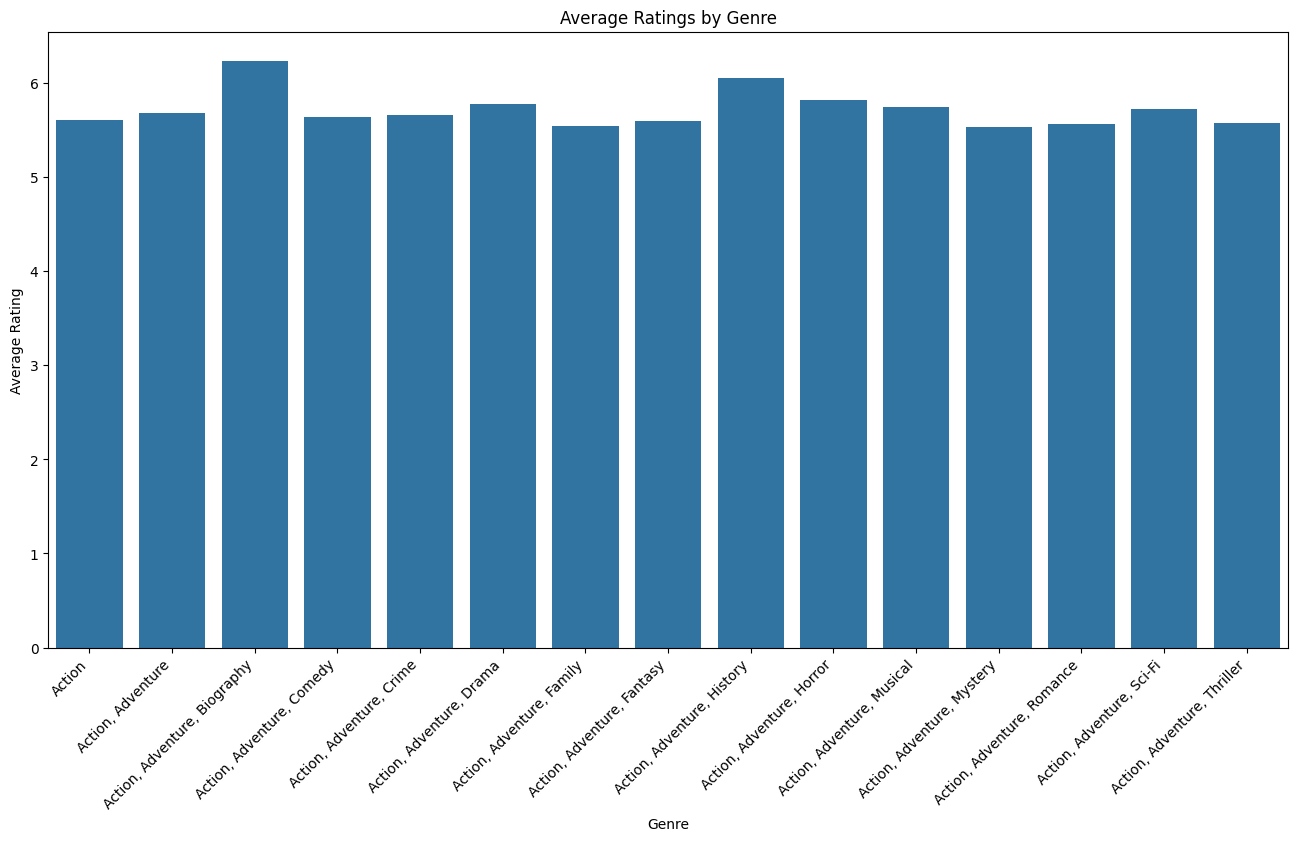

In [15]:
average_ratings_by_genre = data.groupby('Genre')['Rating'].mean().reset_index()
plt.figure(figsize=(16, 8))
sns.barplot(x='Genre', y='Rating', data=average_ratings_by_genre.head(15))
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

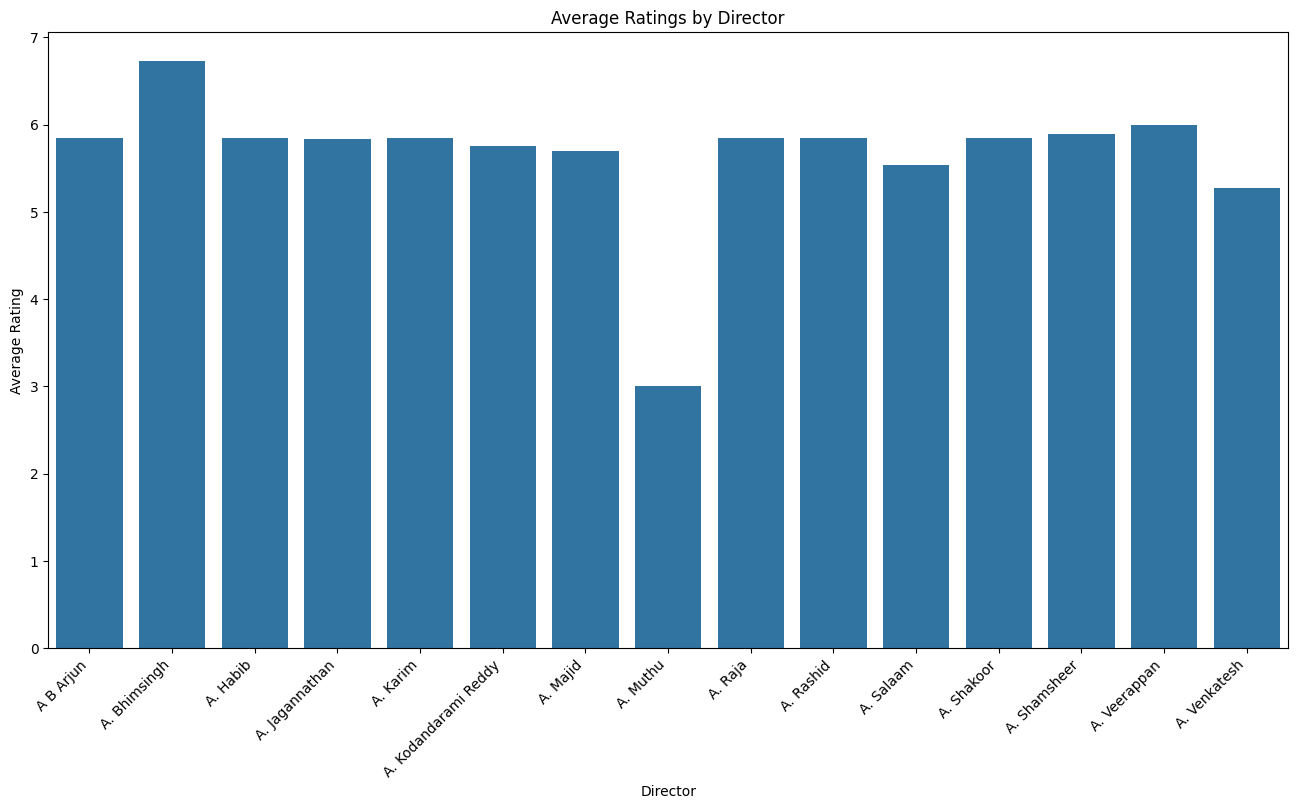

In [16]:
average_ratings_by_director = data.groupby('Director')['Rating'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(x='Director', y='Rating', data=average_ratings_by_director.head(15))
plt.title('Average Ratings by Director')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

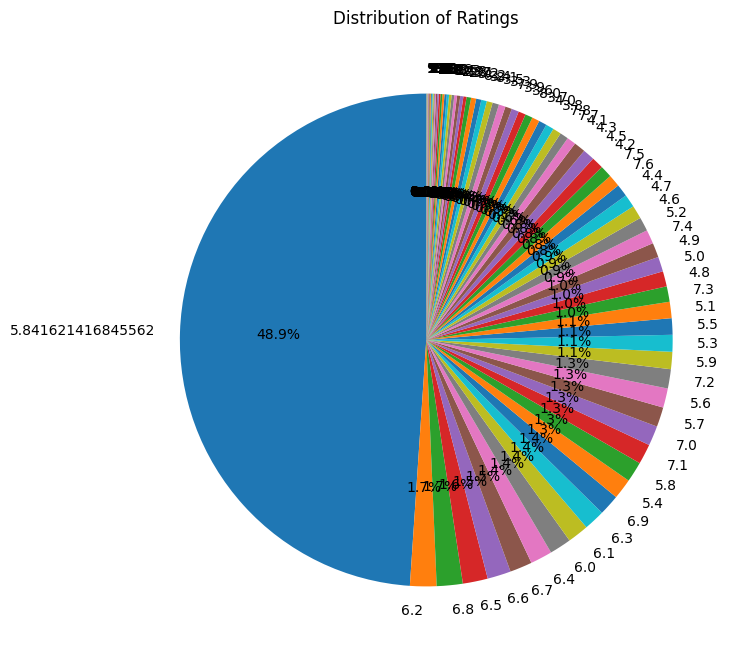

In [17]:
rating_counts = data['Rating'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ratings')
plt.show()

<ipython-input-18-c2b3e573a7f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


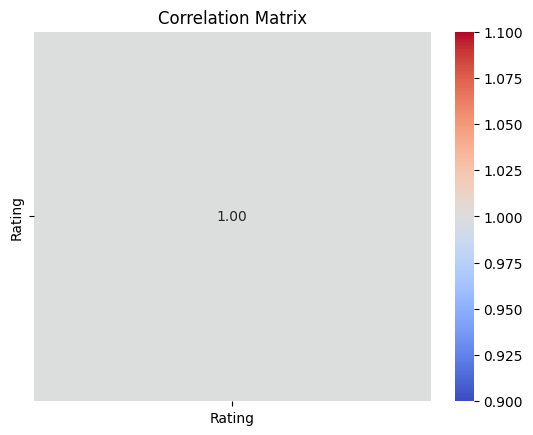

In [18]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [19]:
data.describe()

,Rating
count,15509.000000
mean,5.841621
std,0.987343
min,1.100000
25%,5.841621
50%,5.841621
75%,6.000000
max,10.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Genre     15509 non-null  object 
 2   Rating    15509 non-null  float64
 3   Director  15509 non-null  object 
 4   Actor 1   15509 non-null  object 
 5   Actor 2   15509 non-null  object 
 6   Actor 3   15509 non-null  object 
dtypes: float64(1), object(6)
memory usage: 848.3+ KB


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
title_vectorizer = TfidfVectorizer()
title_features = title_vectorizer.fit_transform(data['Name'].fillna(''))


In [22]:
print(data.columns)

Index(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')


In [23]:
data = pd.get_dummies(data, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])
data.columns

Index(['Name', 'Rating', 'Genre_Action', 'Genre_Action, Adventure',
       'Genre_Action, Adventure, Biography', 'Genre_Action, Adventure, Comedy',
       'Genre_Action, Adventure, Crime', 'Genre_Action, Adventure, Drama',
       'Genre_Action, Adventure, Family', 'Genre_Action, Adventure, Fantasy',
       ...
       'Actor 3_Zeenat Aman', 'Actor 3_Zeeshan Khan', 'Actor 3_Zeishan Quadri',
       'Actor 3_Zenobia Shroff', 'Actor 3_Zohra', 'Actor 3_Zoya Hussain',
       'Actor 3_Zubeida', 'Actor 3_Zuber K. Khan', 'Actor 3_Zulfi Sayed',
       'Actor 3_Zunaid Memon'],
      dtype='object', length=20854)

In [24]:
data.head()

,Name,Rating,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy",...,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zuber K. Khan,Actor 3_Zulfi Sayed,Actor 3_Zunaid Memon
0,,5.841621,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,#Gadhvi (He thought he was Gandhi),7.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,#Homecoming,5.841621,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,4.400000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,...And Once Again,5.841621,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
features = data.columns
x = data[features]
y = data['Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

y_train = pd.to_numeric(y_train, errors='coerce')

numeric_columns = x_train.select_dtypes(include=['float64', 'int64']).columns
x_train = x_train[numeric_columns]

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [26]:
data.shape

(15509, 20854)

In [27]:
x_train.shape

(12407, 1)

In [28]:
x_test.shape

(3102, 20854)

In [29]:
x_train_pred = model.predict(x_train)
x_train_pred

array([5.84162142, 4.8       , 5.        , ..., 6.1       , 3.9       ,
       5.84162142])

In [30]:
y_train_pred = model.predict(x_train)

mae = mean_absolute_error(y_train, y_train_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 6.430112525470661e-16


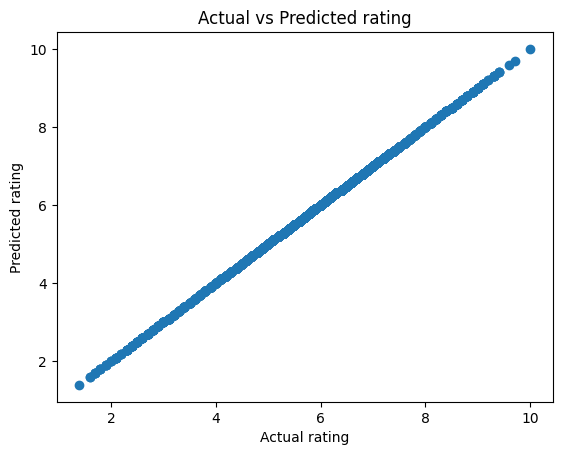

In [31]:
plt.scatter(y_train, x_train_pred)
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.title('Actual vs Predicted rating')
plt.show()